In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from envs import TradingEnv
from utils import preprocessing

from stable_baselines3 import DQN, A2C, PPO
from sb3_contrib import QRDQN

from stable_baselines3.common.env_checker import check_env

Loading BokehJS ...

In [2]:
lookback_window = 20
fee = 0.000665
assets = 10000

In [3]:
df = pd.read_csv("./data/3600/ethusd/2021-01-01.csv", parse_dates=[0]).set_index("Date")
train_df = df[: len(df) // 2]
eval_df = df[len(df) // 2 :]
train_env = TradingEnv(lookback_window=lookback_window, df=train_df, preprocessed_df=preprocessing(train_df), assets=assets, fee=fee)
eval_env = TradingEnv(lookback_window=lookback_window, df=eval_df, preprocessed_df=preprocessing(eval_df), assets=assets, fee=fee)

check_env(train_env)

AssertionError: The observation returned by the `reset()` method does not match the given observation space

In [ ]:
train_env.reset()
train_env.observation_space.sample().shape == train_env._state.shape

True

In [ ]:
model = DQN("MlpPolicy", train_env, verbose=0).learn(1000)

In [ ]:
def evaluate(model: A2C, env, render=True) -> np.ndarray:
    state = env.reset()
    print(state.shape)
    done = False

    episode_rewards = []

    while not done:
        action, state = model.predict(state)
        state, reward, done, info = env.step(action)

        if render:
            env.render()

        episode_rewards.append(reward)

        if done:
            break

    return np.array(episode_rewards)

(20, 13)


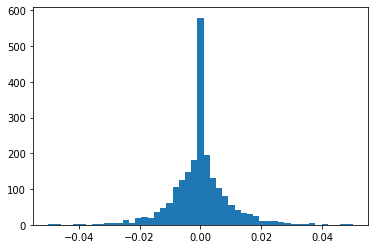

In [ ]:
episode_rewards = evaluate(model, eval_env, False)
fig, axs = plt.subplots(1, 1)
bins = np.linspace(-0.05, 0.05, 50)
n, bins, patches = axs.hist(episode_rewards, bins=bins)

(20, 13)


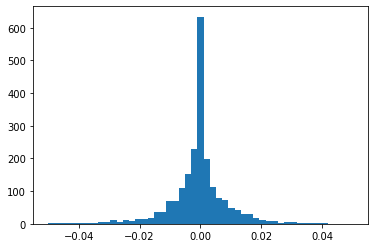

In [ ]:
episode_rewards = evaluate(model, train_env, False)
fig, axs = plt.subplots()
n, bins, patches = axs.hist(episode_rewards, bins=bins)

In [ ]:
from models.cnn_features_extractor import CustomCNN

policy_kwargs = dict(
    features_extractor_class=CustomCNN,
    features_extractor_kwargs=dict(features_dim=128),
)
model = DQN("CnnPolicy", train_env, verbose=0, policy_kwargs=policy_kwargs).learn(1000)

(20, 13)


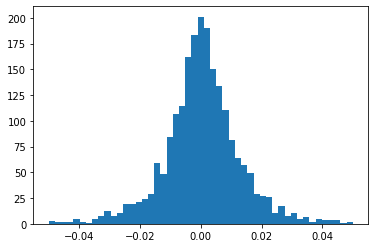

In [ ]:
episode_rewards = evaluate(model, eval_env, False)
fig, axs = plt.subplots(1, 1)
bins = np.linspace(-0.05, 0.05, 50)
n, bins, patches = axs.hist(episode_rewards, bins=bins)